In [ ]:
import numpy as np
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['winequality-red.csv']))

In [ ]:

df.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [ ]:
df.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

# Model

In [ ]:
from sklearn.model_selection import train_test_split

# The target variable is 'quality'.
target = 'quality'
Y = df[target]
X = df.drop(target, axis = 1)

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=1000)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
if isinstance(X_test, np.ndarray):
  X_test = pd.DataFrame(X_test, columns=["col{}".format(k) for k in range(X_test.shape[1])])
if isinstance(X_train, np.ndarray):
  X_train = pd.DataFrame(X_train, columns=["col{}".format(k) for k in range(X_train.shape[1])])
if isinstance(Y_test, np.ndarray):
  Y_test = pd.DataFrame(Y_test, columns=["col{}".format(k) for k in range(Y_test.shape[1])])
if isinstance(Y_train, np.ndarray):
  Y_train = pd.DataFrame(Y_train, columns=["col{}".format(k) for k in range(Y_train.shape[1])])

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree

https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn

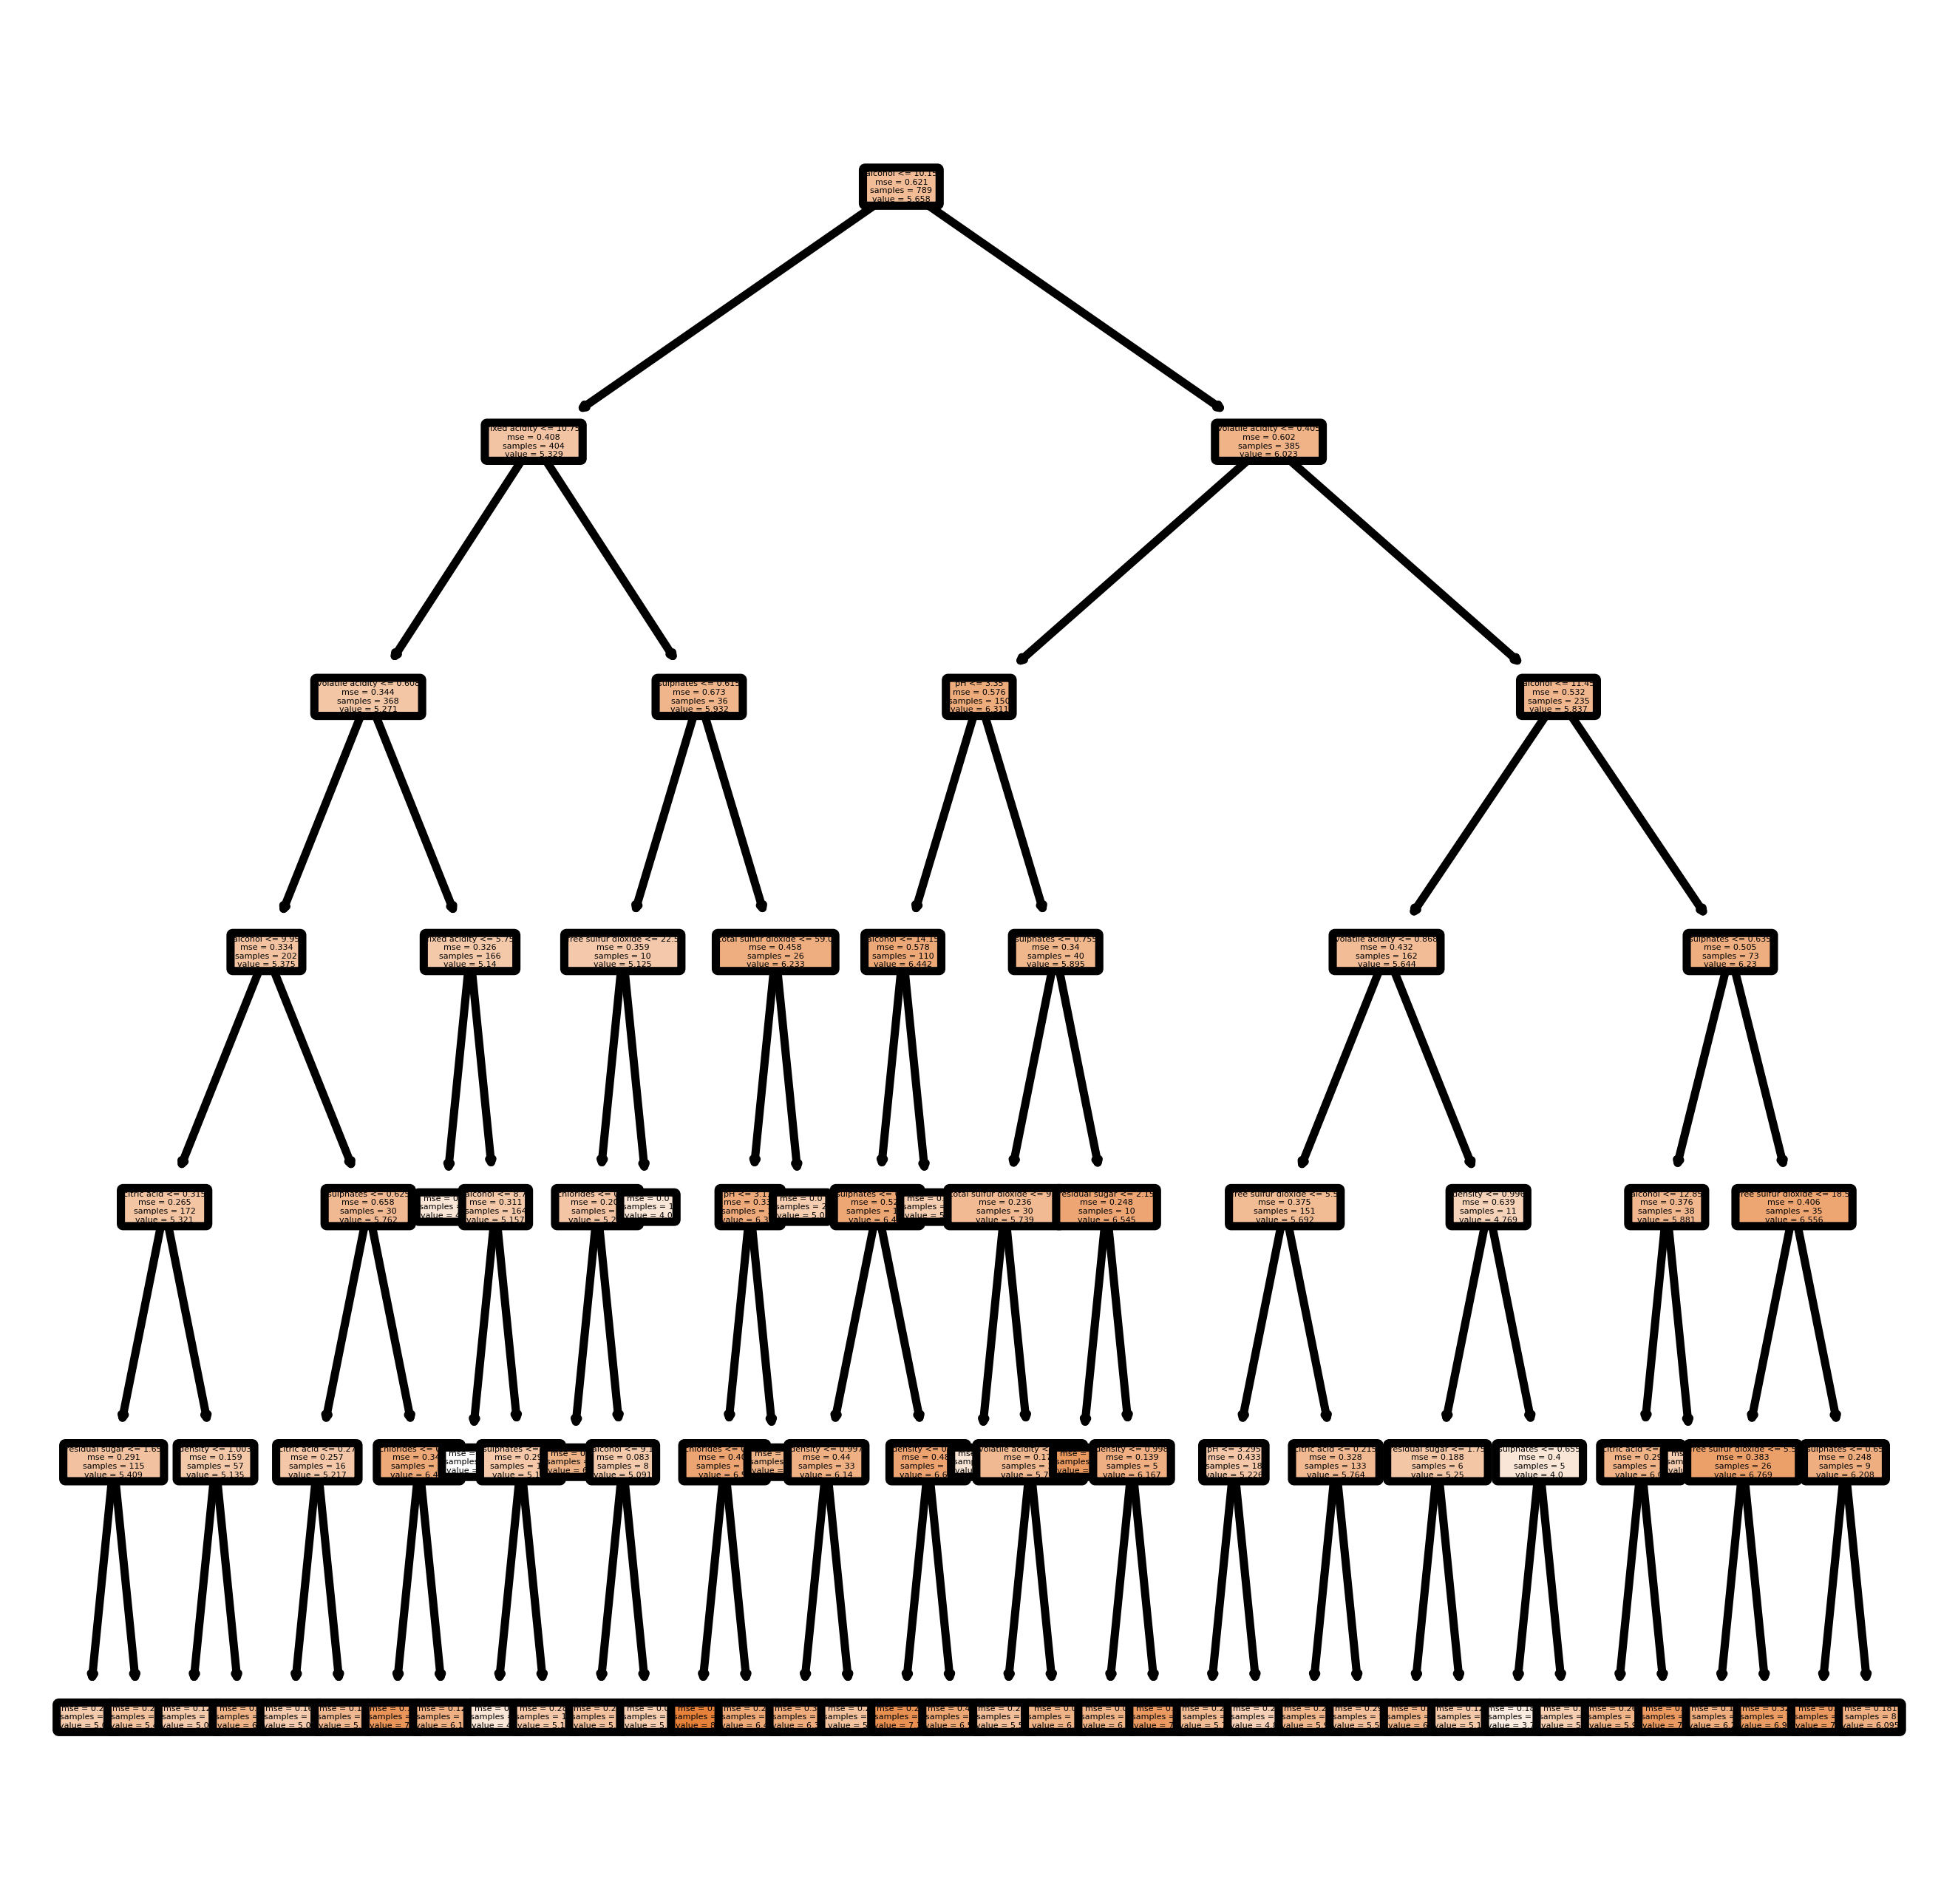

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)

_=tree.plot_tree(model.estimators_[0],
                feature_names=X.columns,
                filled=True,
                rounded=True)

# PDP

https://www.kaggle.com/dansbecker/partial-plots

In [ ]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 74kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=7cb60309dede02eef5cad8cf27945416d6ce9a2db1cdf839e6beeea85990a5b4
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [ ]:
from pdpbox import pdp, get_dataset, info_plots

In [ ]:
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):
    
    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)
    plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


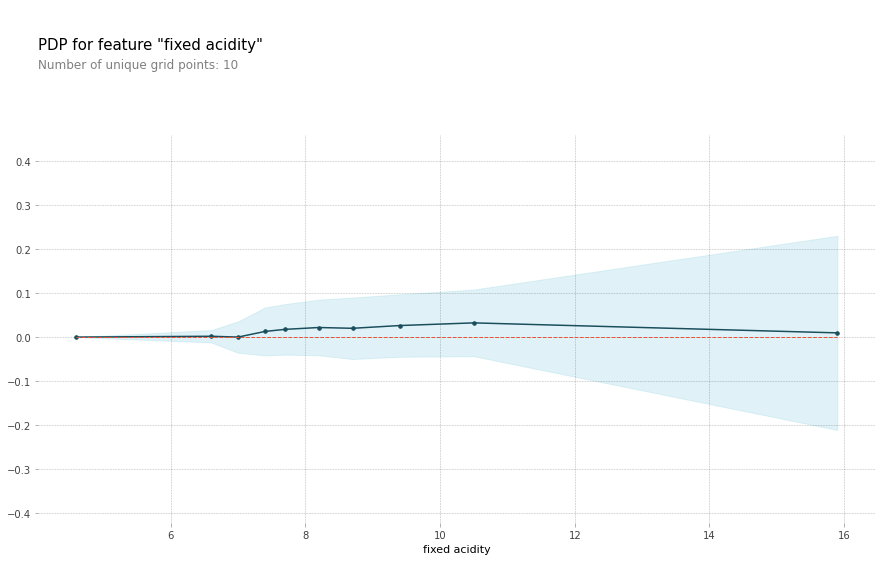

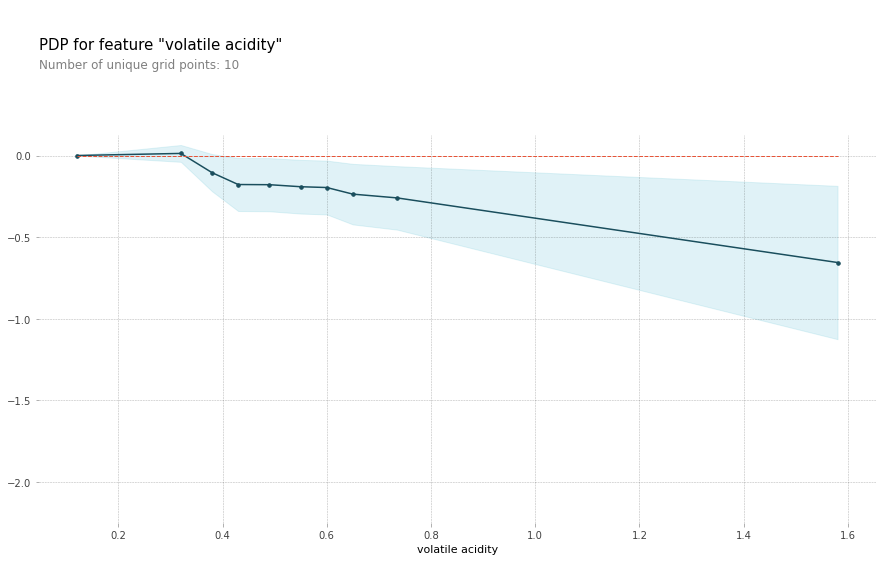

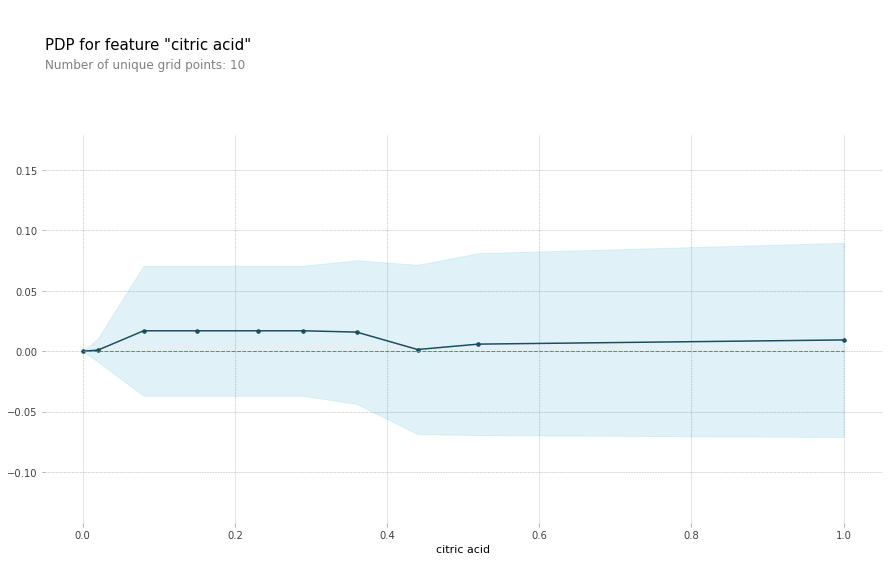

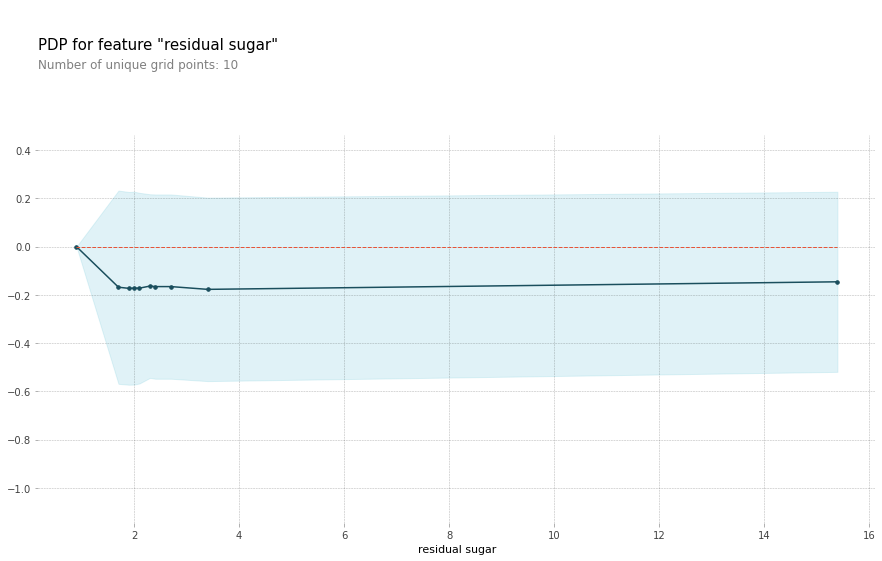

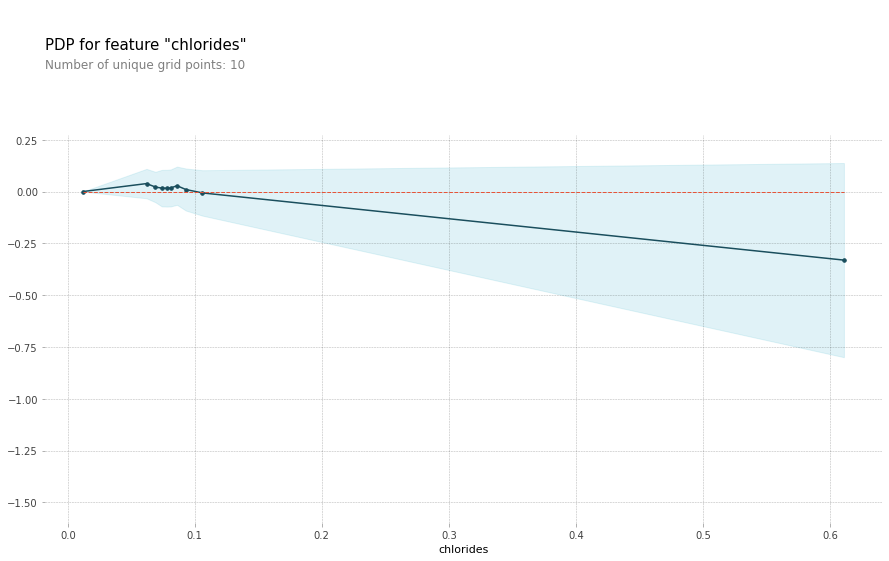

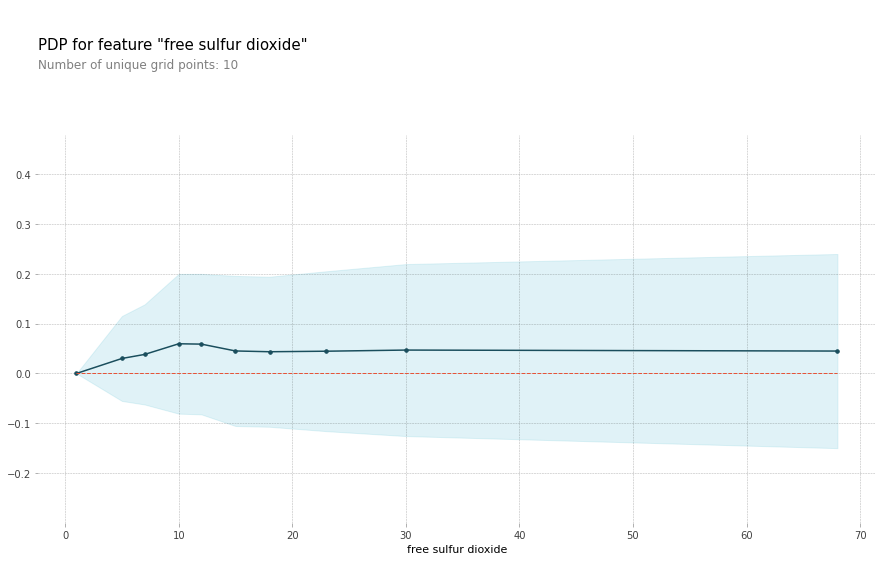

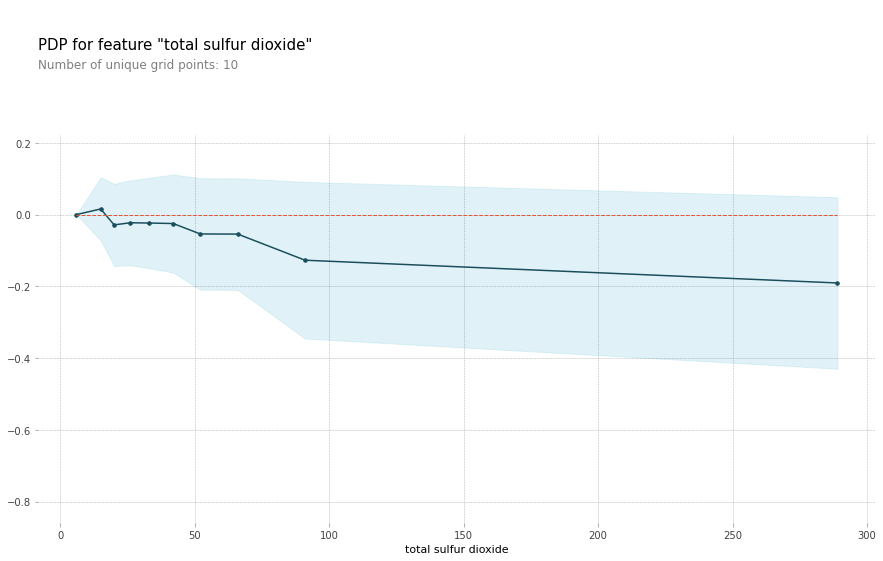

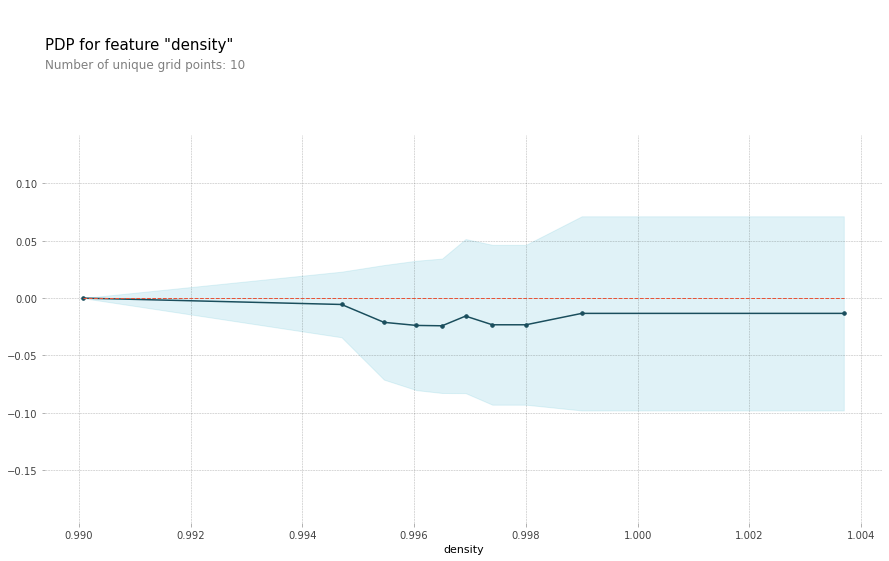

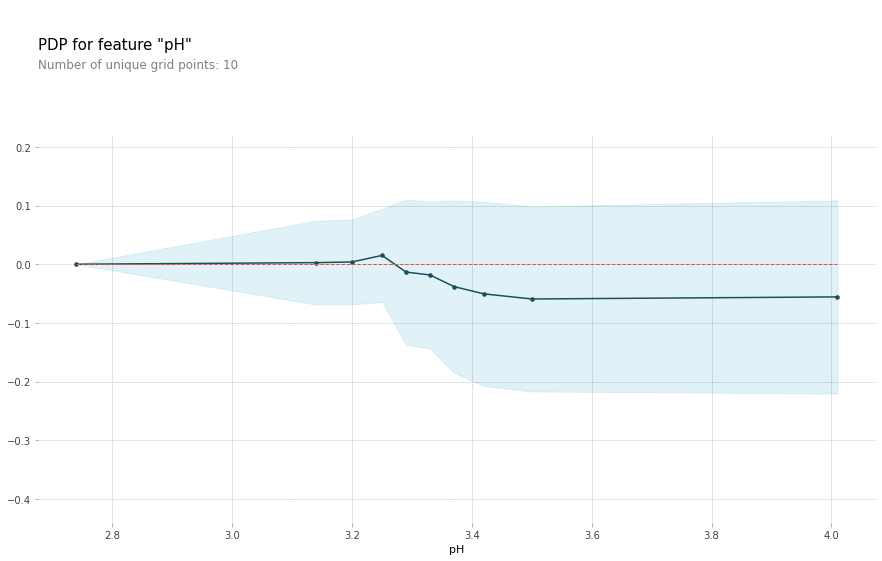

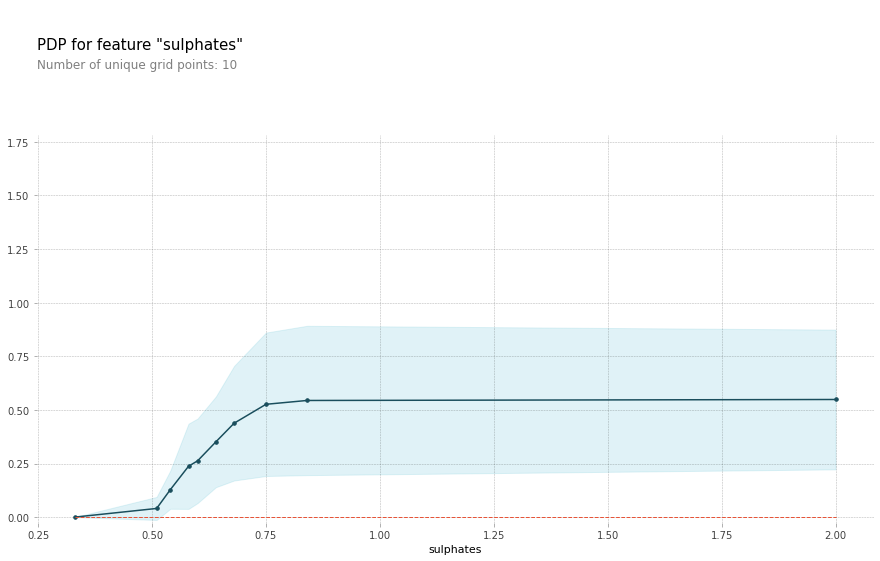

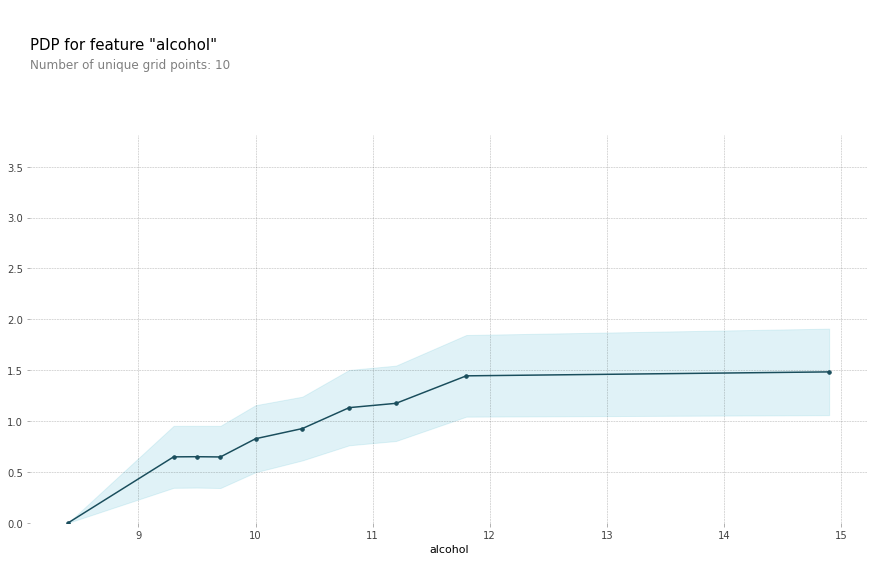

In [ ]:
for column in X_train.columns :

  plot_pdp(model, X_train, column)

# ICE

http://savvastjortjoglou.com/intrepretable-machine-learning-nfl-combine.html

https://stackoverflow.com/questions/60164019/pycebox-iceplot-does-not-work-on-xgboost-while-work-on-random-forest

In [ ]:
!pip install pycebox

  Created wheel for pycebox: filename=pycebox-0.0.1-cp36-none-any.whl size=3644 sha256=70a01c17b88babb5633c95aff7c476b0c9e843d304e738750f63e2f49f870572
  Stored in directory: /root/.cache/pip/wheels/58/5e/65/001126ca8b1f5c71e9571d09ba579e82bb0792062e7a82e77c
Successfully built pycebox


In [ ]:
from pycebox.ice import ice, ice_plot

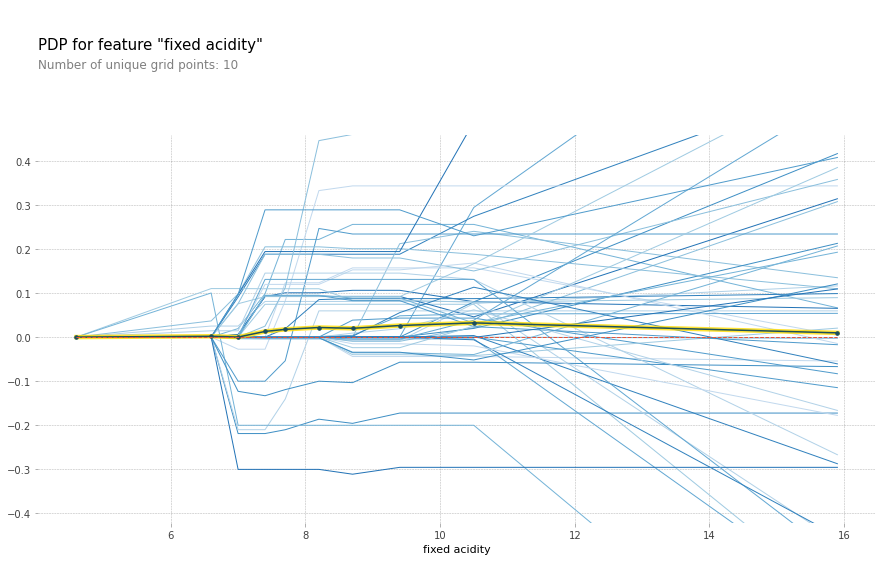

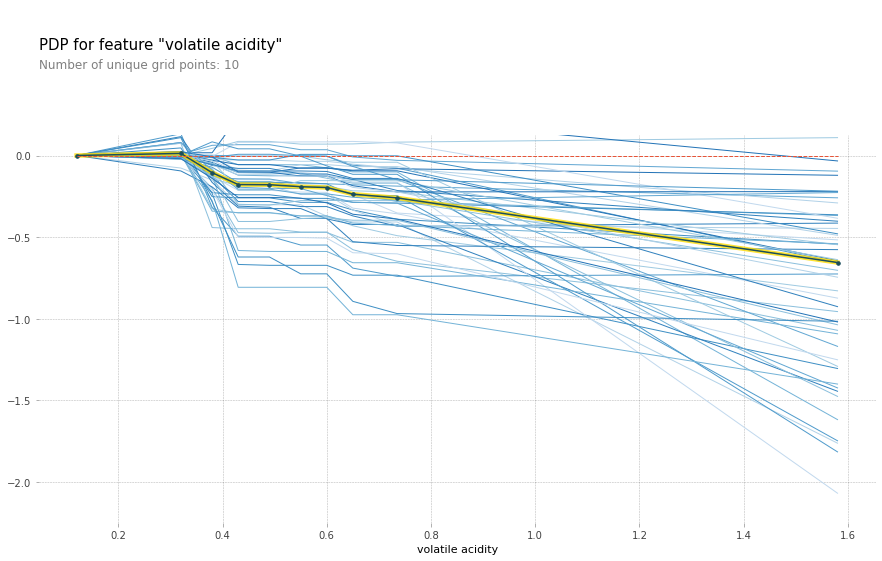

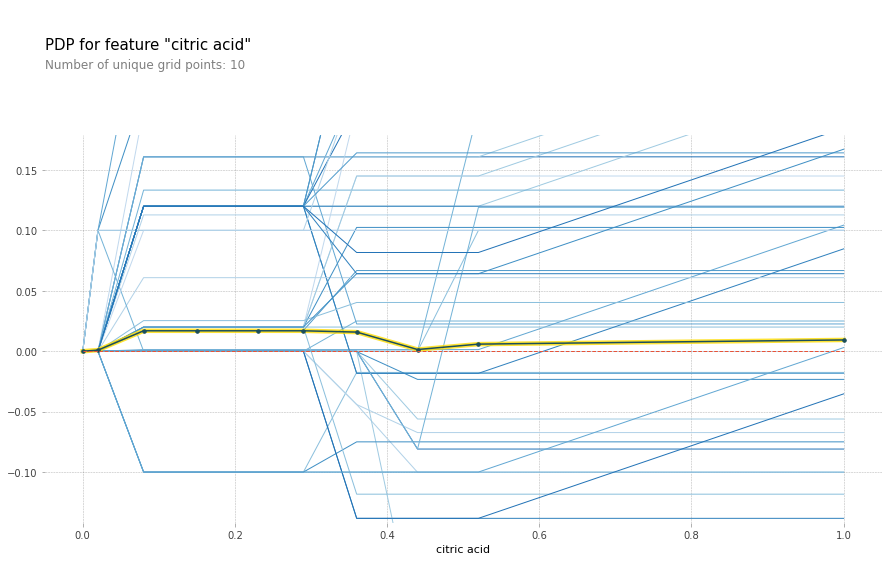

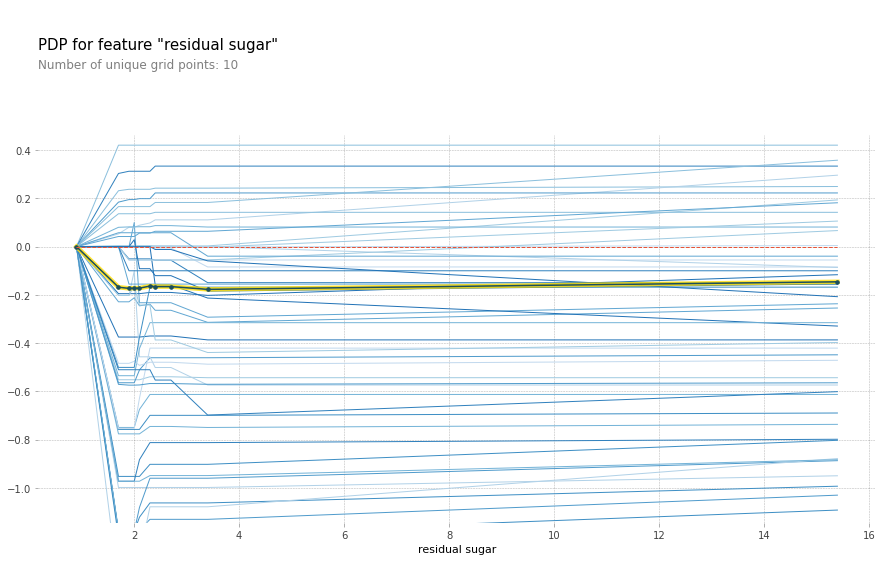

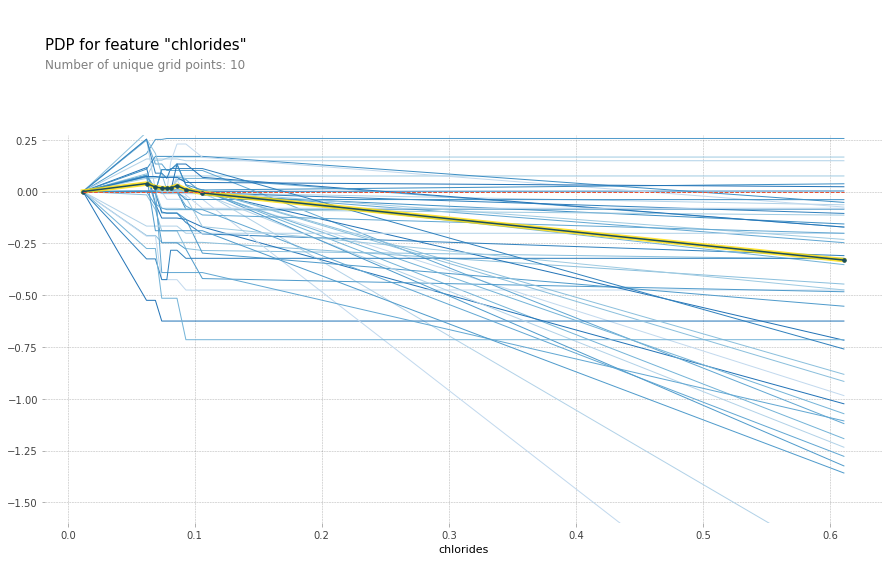

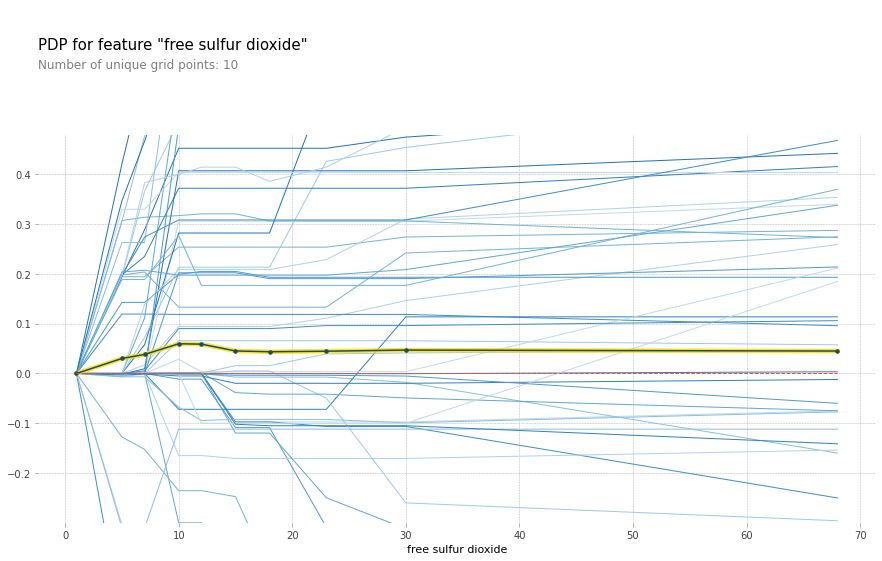

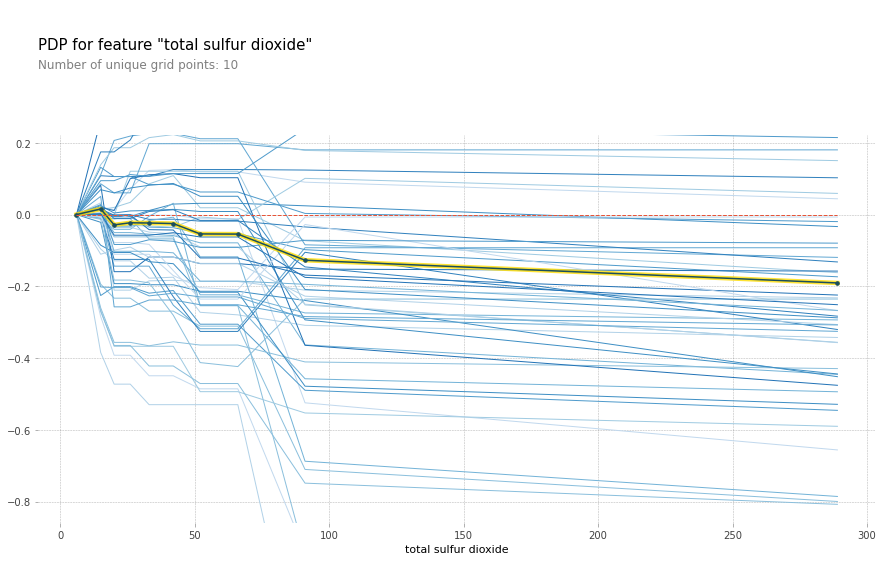

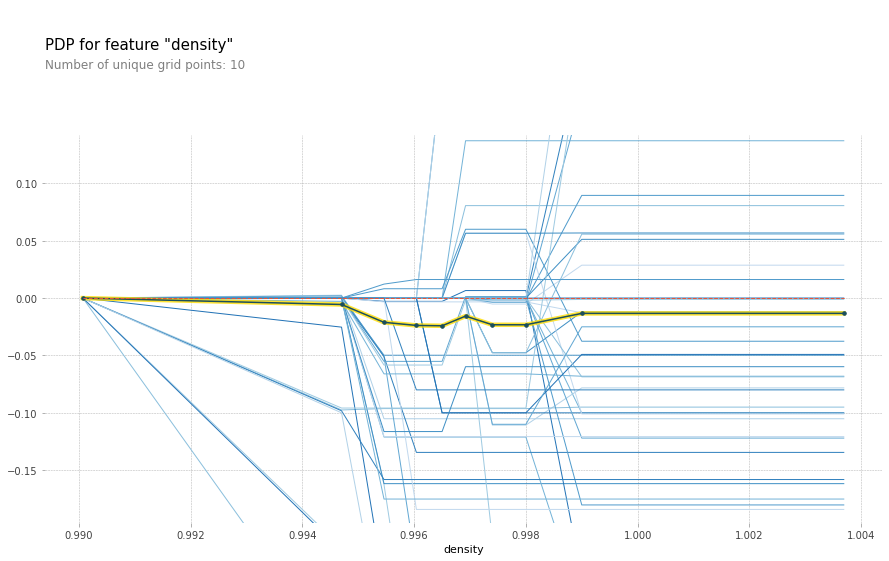

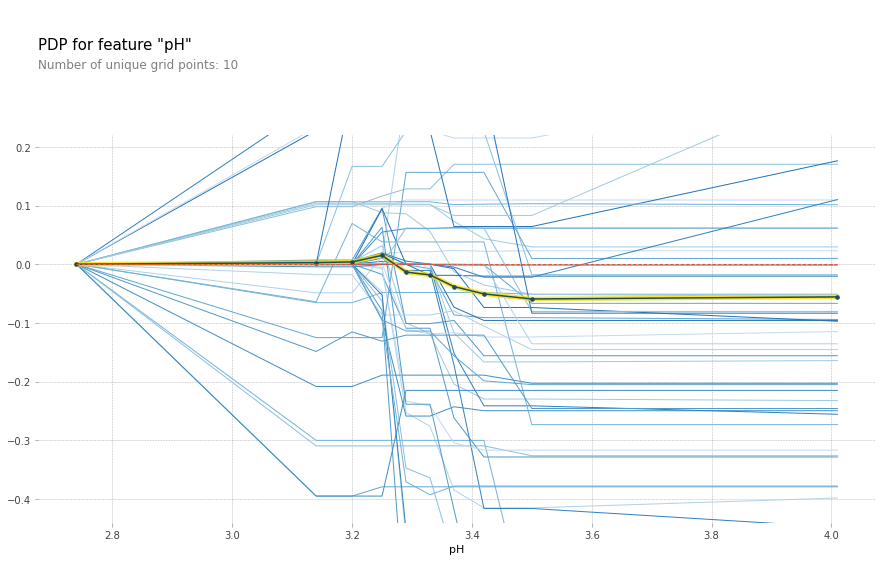

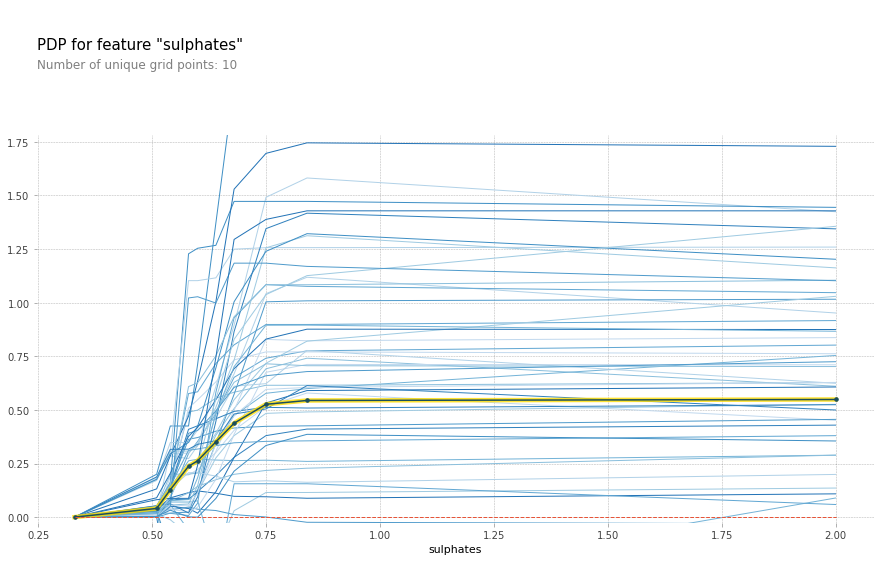

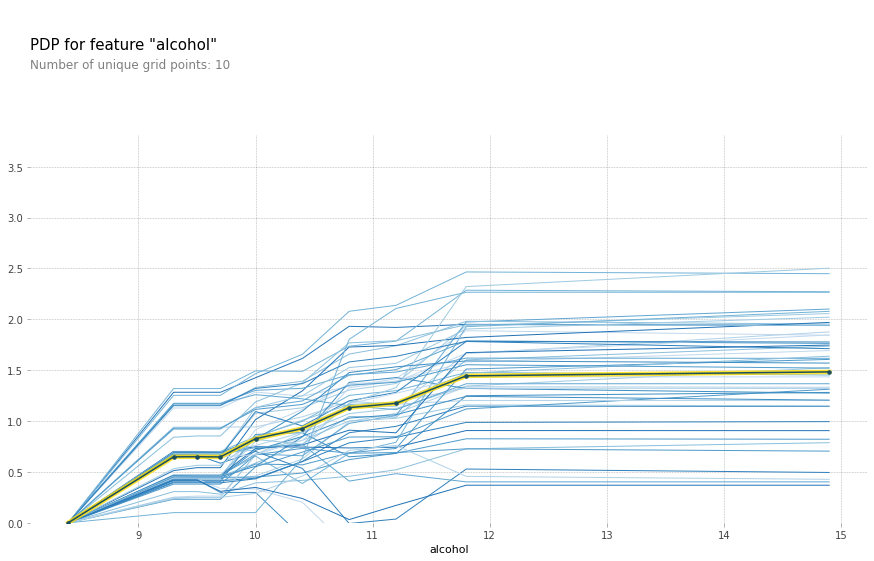

In [ ]:
for column in X_train.columns :
  plot_pdp(model, X_train, column, cluster_flag=True, nb_clusters=50, lines_flag=True)

# Permutation importance

https://www.kaggle.com/dansbecker/permutation-importance

In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 2.9MB/s 


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

Using TensorFlow backend.


In [ ]:
perm = PermutationImportance(model, random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

# SHAP

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

In [ ]:
!pip install shap

     |████████████████████████████████| 276kB 7.2MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394119 sha256=f2b97ec6114f22102db1f55023d0169ee58f87ccc90397312a91b49b8001365c
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [ ]:
import shap

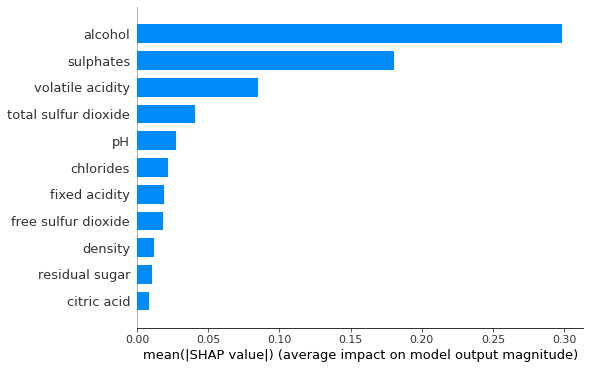

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

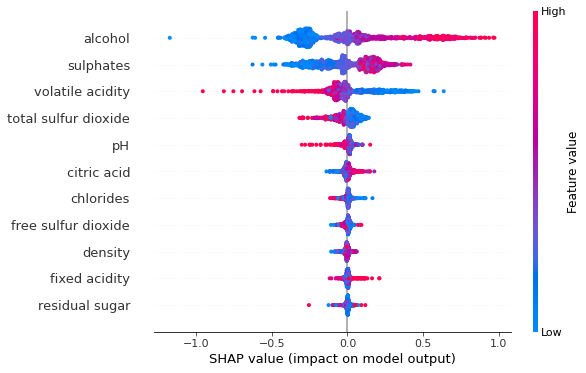

In [ ]:
shap.summary_plot(shap_values, X_train)

Dependance plot on SHAP :

In [1]:
for column in X_train.columns :

  if isinstance(shap_values, list) :

    for classe in range(len(shap_values)) :

      shap.dependence_plot(column, shap_values[classe], X_train)

  else :
    
    shap.dependence_plot(column, shap_values, X_train)

NameError: ignored

# Feature importance

https://www.analyticsvidhya.com/blog/2019/08/decoding-black-box-step-by-step-guide-interpretable-machine-learning-models-python/


https://www.kaggle.com/bersk91/uni-analytics-datadragons/notebook

Feature: 0, Score: 0.03428
Feature: 1, Score: 0.18186
Feature: 2, Score: 0.03670
Feature: 3, Score: 0.02462
Feature: 4, Score: 0.03383
Feature: 5, Score: 0.04629
Feature: 6, Score: 0.06303
Feature: 7, Score: 0.03839
Feature: 8, Score: 0.03630
Feature: 9, Score: 0.11420
Feature: 10, Score: 0.39050


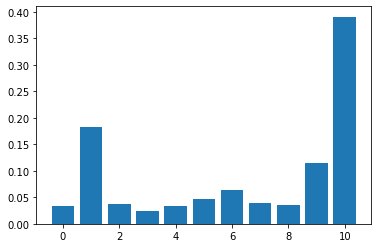

In [ ]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# LIME

https://blog.octo.com/introduction-a-linterpretation-de-modeles-de-machine-learning/

In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 2.7MB/s 
     |████████████████████████████████| 2.0MB 8.5MB/s 
  Created wheel for lime: filename=lime-0.2.0.0-cp36-none-any.whl size=284181 sha256=1fb07a1c8cde500eda6b28b51e8191aac426799db31783a5cfd4958053770681
  Stored in directory: /root/.cache/pip/wheels/22/f2/ec/e5ebd07348b2b1ac722e91c2f549fcc220f7d5f25497a61232
Successfully built lime
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [ ]:
import lime
import lime.lime_tabular


In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode='regression',training_labels=Y_train, 
                                                   feature_names=df.columns)
explanation = explainer.explain_instance(X_test.values[0], model.predict)
explanation.show_in_notebook()